# Scotch Whiskies Expoloratory Data Analysis
#### This Jupyter Notebook goes through the cleaning, data visualization, and beginning clustering procedure for data analysis of the data set

In [117]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from mpl_toolkits.basemap import Basemap

### Import the Data from a csv file

In [3]:
scotch_df = pd.read_csv('Scotch.csv')

### Start Cleaning the Data

In [4]:
# Remove DISTRICT variable from dataset for now
scotch_df.drop(['DISTRICT'], axis = 1, inplace = True, errors = 'ignore')

In [5]:
scotch_df.drop(['NAME_2','DIST','REGION','islay','midland','spey','east','west','north ','lowland','campbell','islands'], axis = 1, inplace = True, errors = 'ignore')
print scotch_df.columns.values
print scotch_df.head(10)
print scotch_df.shape

['NAME_1' 'color_wyne' 'color_yellow' 'color_v.pale' 'color_pale'
 'color_p.gold' 'color_gold' 'color_o.gold' 'color_f.gold' 'color_bronze'
 'color_p.amber' 'color_amber' 'color_f.amber' 'color_red' 'color_sherry'
 'NOSE_AROMA' 'NOSE_PEAT' 'NOSE_SWEET' 'NOSE_LIGHT' 'NOSE_FRESH' 'NOSE_DRY'
 'NOSE_FRUIT' 'NOSE_GRASS' 'NOSE_SEA' 'NOSE_SHERRY' 'NOSE_SPICY'
 'NOSE_RICH' 'BODY_soft' 'BODY_med' 'BODY_full' 'BODY_round' 'BODY_smooth'
 'BODY_light' 'BODY_firm' 'BODY_oily' 'PAL_full' 'PAL_dry' 'PAL_sherry'
 'PAL_big' 'PAL_light' 'PAL_smooth' 'PAL_clean' 'PAL_fruit' 'PAL_grass'
 'PAL_smoke' 'PAL_sweet' 'PAL_spice' 'PAL_oil' 'PAL_salt' 'PAL_arome'
 'FIN_full' 'FIN_dry' 'FIN_warm' 'FIN_big' 'FIN_light' 'FIN_smooth'
 'FIN_clean' 'FIN_fruit' 'FIN_grass' 'FIN_smoke' 'FIN_sweet' 'FIN_spice'
 'FIN_oil' 'FIN_salt' 'FIN_arome' 'FIN_ling' 'FIN_long' 'FIN_very'
 'FIN_quick' 'AGE' 'SCORE' '%']
         NAME_1  color_wyne  color_yellow  color_v.pale  color_pale  \
0     Aberfeldy         0.0           1.0    

In [6]:
scotch_df.dropna(inplace = True)
# print scotch_df.isnull().sum()

In [40]:
avg_age = scotch_df[scotch_df.AGE != -9]['AGE'].mean()
scotch_df[scotch_df.AGE == -9]['AGE'] = avg_age

### Create Numpy Array and Start Clustering Procedure

In [41]:
scotch_nparr = np.array(scotch_df.iloc[:,1:])
# print scotch_df.iloc[0,1:69]

In [42]:
# Initialize and carry out clustering
starting_number_of_clusters = 2
ending_number_of_clusters = 10

# Model the data and create the centroids
k_range = range(starting_number_of_clusters, ending_number_of_clusters + 1)
km = [KMeans(n_clusters = k).fit(scotch_nparr) for k in k_range]
centroids = [X.cluster_centers_ for X in km] # List of lists of centroids

In [43]:
# For every point in the data set, calculate the eclidean distance from the points to the centroids
k_euclid = [distance.cdist(scotch_nparr, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [44]:
# Centroids in a list of list of centroids of which are defined by 71 variables
print "There are %d different K's being tried." % len(k_range)
print ["%d Centroids" % len(centroids[i]) for i in range(0,len(k_range))]

# k_euclid[0] returns a distance matrix where each M[i,j] is the distance from the i-th
# sample point to the j-th centroid. k_euclid contains len(k_range) number of distance
# matricies
print np.shape(k_euclid[0])
print np.shape(k_euclid[1])
print np.shape(k_euclid[2])


# For all the samples (rows) in the matrix, find the cluster-distance (column) that has the min distance
# and return the distance
print len(dist[0])
print np.shape(dist[0])
print np.shape(dist)

There are 9 different K's being tried.
['2 Centroids', '3 Centroids', '4 Centroids', '5 Centroids', '6 Centroids', '7 Centroids', '8 Centroids', '9 Centroids', '10 Centroids']
(109, 2)
(109, 3)
(109, 4)
109
(109,)
(9, 109)


In [45]:
# Same as the Within-Cluster Sum of Squares
print [X.inertia_ for X in km]

[5535.6286702388206, 4122.7768550225628, 3333.7671235592416, 2894.5366318457827, 2466.4986073670052, 2246.384066638152, 2102.7222767467601, 1952.7664940414222, 1867.5415259806846]


In [46]:
# Within-Cluster Sum of Squares
wcss = [sum(d**2) for d in dist]
print wcss

[5535.6286702388197, 4122.7768550225637, 3333.7671235592416, 2894.5366318457809, 2466.4986073670048, 2246.3840666381529, 2102.7222767467606, 1952.7664940414227, 1867.5415259806855]


In [47]:
# Total Sum of Squares
tss = sum(distance.pdist(scotch_nparr)**2 / scotch_nparr.shape[0])
print tss

8700.13681766


In [48]:
# Between-Cluster Sum of Squares
bss = tss - wcss
print bss

[ 3164.50814743  4577.35996264  5366.3696941   5805.60018582  6233.6382103
  6453.75275103  6597.41454092  6747.37032362  6832.59529168]


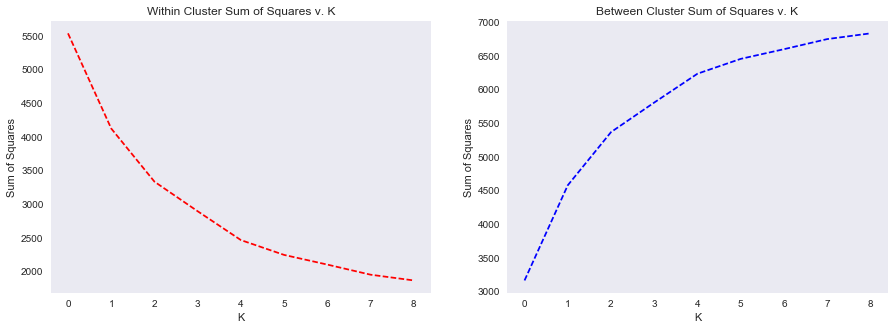

In [49]:
plt.figure(num = 1, figsize = (15,5))

plt.subplot(121)
plt.title('Within Cluster Sum of Squares v. K')
plt.grid(False)
plt.ylabel('Sum of Squares')
plt.xlabel('K')
plt.plot(wcss, 'r--')
plt.subplot(122)
plt.title('Between Cluster Sum of Squares v. K')
plt.grid(False)
plt.ylabel('Sum of Squares')
plt.xlabel('K')
plt.plot(bss, 'b--')
plt.show()

## Understand the Elbow Method
"Then, plot a line chart of the SSE for each value of k. 
If the line chart looks like an arm, then the "elbow" on the 
arm is the value of k that is the best. The idea is that we 
want a small SSE, but that the SSE tends to decrease toward 0 as 
we increase k (the SSE is 0 when k is equal to the number of data 
points in the dataset, because then each data point 
is its own cluster, and there is no error between it 
and the center of its cluster). So our goal is to 
choose a small value of k that still has a low SSE, and the elbow 
usually represents where we start to have diminishing returns by increasing k."
https://bl.ocks.org/rpgove/0060ff3b656618e9136b

In [50]:
# Print the label/cluster assignment to each of the samples
print len([L.labels_ for L in km][0])
print [L.labels_ for L in km]

109
[array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), array([0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32), array([0, 1, 1, 2, 1, 3, 3, 0, 1, 0, 0, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 0, 3, 0, 0, 3, 3, 3, 3, 2, 1,
       3, 3, 3, 3, 3, 0, 3, 1, 0, 3, 0, 3, 3, 3, 3, 1, 3, 2, 3, 0, 3, 1, 3,
       3, 2, 

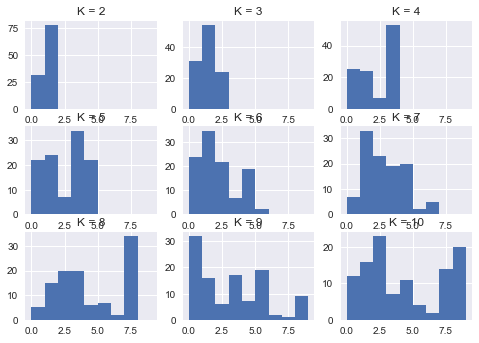

In [51]:
plt.figure()
k_label = 2
for H in km:
    plt.subplot(3,3,k_label - 1)
    plt.title('K = %d' % k_label)
    k_label += 1
    plt.hist([H.labels_][0], range(0,10))
plt.show()

In [52]:
k_label = 2
k_df = pd.DataFrame()
for H in km:
    col_name = "K%d" % k_label
    k_label += 1
    k_df[col_name] = H.labels_
k_df

,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,1,0,0,4,2,2,3,1,1
1,0,2,1,1,0,4,2,5,8
2,0,2,1,1,0,4,2,5,0
3,1,0,2,2,3,6,0,4,3
4,0,2,1,1,0,4,2,5,0
5,1,1,3,3,1,1,7,0,2
6,1,1,3,3,1,1,7,0,2
7,1,0,0,4,2,2,3,1,1
8,0,2,1,1,0,4,2,5,0
9,1,0,0,4,2,2,3,1,9


In [53]:
comb_df = scotch_df.join(k_df)
comb_df.head(10)

,NAME_1,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,LAT,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.62,1,0,0,4,2,2,3,1,1
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.46,0,2,1,1,0,4,2,5,8
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.64,0,2,1,1,0,4,2,5,0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,57.32,1,0,2,2,3,6,0,4,3
4,Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,55.91,0,2,1,1,0,4,2,5,0
5,Aultmore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.60,1,1,3,3,1,1,7,0,2
6,Balblair,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.83,1,1,3,3,1,1,7,0,2
7,Balmenach,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,57.42,1,0,0,4,2,2,3,1,1
8,Balvenie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.45,0,2,1,1,0,4,2,5,0
9,Banff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,57.65,1,0,0,4,2,2,3,1,9


In [25]:
feature_cols = comb_df.columns.values[1:69]
print feature_cols

['color_wyne' 'color_yellow' 'color_v.pale' 'color_pale' 'color_p.gold'
 'color_gold' 'color_o.gold' 'color_f.gold' 'color_bronze' 'color_p.amber'
 'color_amber' 'color_f.amber' 'color_red' 'color_sherry' 'NOSE_AROMA'
 'NOSE_PEAT' 'NOSE_SWEET' 'NOSE_LIGHT' 'NOSE_FRESH' 'NOSE_DRY' 'NOSE_FRUIT'
 'NOSE_GRASS' 'NOSE_SEA' 'NOSE_SHERRY' 'NOSE_SPICY' 'NOSE_RICH' 'BODY_soft'
 'BODY_med' 'BODY_full' 'BODY_round' 'BODY_smooth' 'BODY_light' 'BODY_firm'
 'BODY_oily' 'PAL_full' 'PAL_dry' 'PAL_sherry' 'PAL_big' 'PAL_light'
 'PAL_smooth' 'PAL_clean' 'PAL_fruit' 'PAL_grass' 'PAL_smoke' 'PAL_sweet'
 'PAL_spice' 'PAL_oil' 'PAL_salt' 'PAL_arome' 'FIN_full' 'FIN_dry'
 'FIN_warm' 'FIN_big' 'FIN_light' 'FIN_smooth' 'FIN_clean' 'FIN_fruit'
 'FIN_grass' 'FIN_smoke' 'FIN_sweet' 'FIN_spice' 'FIN_oil' 'FIN_salt'
 'FIN_arome' 'FIN_ling' 'FIN_long' 'FIN_very' 'FIN_quick']


### Take a look at how the features are distributed amongst the different kinds of Scotches

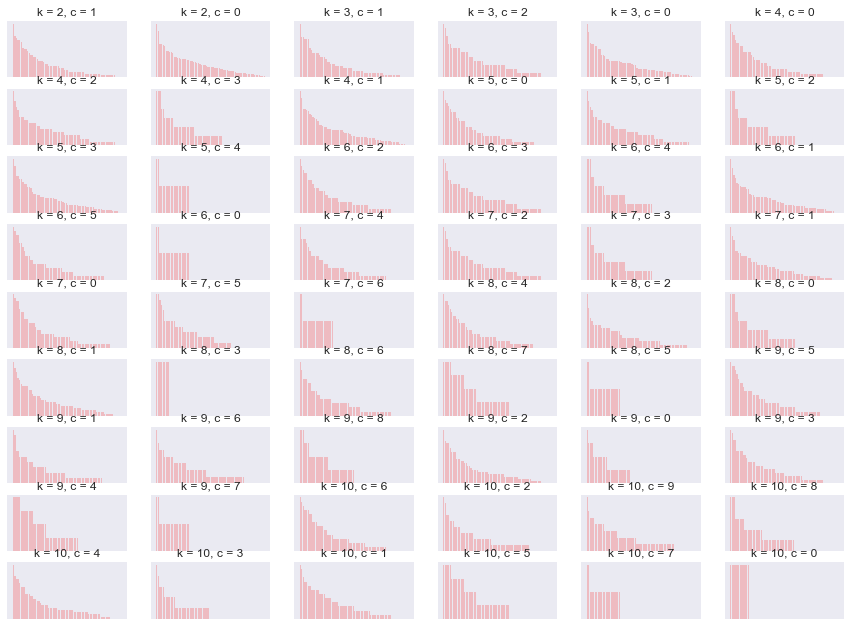

In [26]:
plt.figure(num = 1, figsize = (15,11))

# labels = [i for i in comb_df['K2']]
# labels = labels[:68]
# colors = ['red','blue']
# colors_list = [colors[i] for i in labels]

opacity = 0.2

i = 1
for k in k_range:
    col_index = "K%d" % k
    unique_clusters = comb_df[col_index].unique()
    for c in unique_clusters:
        plt.subplot(9,6,i)
        i += 1
        
        plt.title("k = %d, c = %d" % (k, c))
        plt.bar(range(68), comb_df[comb_df[col_index] == c][feature_cols].sum().sort_values(ascending = False), color = 'red', alpha = opacity)
#         plt.bar(range(68), comb_df[comb_df[col_index] == c][feature_cols].sum(), color = colors_list, alpha = opacity)
        plt.xticks([])
        plt.yticks([])
plt.show()
        

In [54]:
cluster_list = []
for k in k_range:
    col_index = "K%d" % k
    unique_clusters = comb_df[col_index].unique()
    l = []
    for c in unique_clusters:
        print "[K = %d, C = %d]" % (k, c)
        l.append(comb_df[comb_df[col_index] == c][feature_cols].sum())
#         print comb_df[comb_df[col_index] == c][feature_cols].columns.values
    cluster_list.append(l)

[K = 2, C = 1]
[K = 2, C = 0]
[K = 3, C = 0]
[K = 3, C = 2]
[K = 3, C = 1]
[K = 4, C = 0]
[K = 4, C = 1]
[K = 4, C = 2]
[K = 4, C = 3]
[K = 5, C = 4]
[K = 5, C = 1]
[K = 5, C = 2]
[K = 5, C = 3]
[K = 5, C = 0]
[K = 6, C = 2]
[K = 6, C = 0]
[K = 6, C = 3]
[K = 6, C = 1]
[K = 6, C = 4]
[K = 6, C = 5]
[K = 7, C = 2]
[K = 7, C = 4]
[K = 7, C = 6]
[K = 7, C = 1]
[K = 7, C = 3]
[K = 7, C = 0]
[K = 7, C = 5]
[K = 8, C = 3]
[K = 8, C = 2]
[K = 8, C = 0]
[K = 8, C = 7]
[K = 8, C = 1]
[K = 8, C = 4]
[K = 8, C = 5]
[K = 8, C = 6]
[K = 9, C = 1]
[K = 9, C = 5]
[K = 9, C = 4]
[K = 9, C = 0]
[K = 9, C = 7]
[K = 9, C = 3]
[K = 9, C = 8]
[K = 9, C = 2]
[K = 9, C = 6]
[K = 10, C = 1]
[K = 10, C = 8]
[K = 10, C = 0]
[K = 10, C = 3]
[K = 10, C = 2]
[K = 10, C = 9]
[K = 10, C = 7]
[K = 10, C = 4]
[K = 10, C = 6]
[K = 10, C = 5]


### Look at top {num_flavors} flavors for {num_clusters} number of K-Mean clusters

In [55]:
# Between 1 and 9
num_clusters = 3
# Between 0 and 68
num_flavors = 10

# feature_list = [cluster_list[i][1].sort_values(ascending = False)[:num_flavors] for i in range(num_clusters)]

feature_list = [cluster_list[num_clusters - 2][i].sort_values(ascending = False)[:num_flavors] for i in range(num_clusters)]


print feature_list[0].index.values
print feature_list[1].index.values
print feature_list[2].index.values

'''cluster_list[*cluster number index*][*cluster*]'''


['PAL_sweet' 'BODY_light' 'PAL_dry' 'BODY_med' 'NOSE_PEAT' 'NOSE_DRY'
 'NOSE_FRUIT' 'NOSE_AROMA' 'FIN_dry' 'BODY_soft']
['PAL_sweet' 'BODY_med' 'NOSE_SWEET' 'NOSE_PEAT' 'NOSE_SEA' 'NOSE_RICH'
 'BODY_light' 'NOSE_GRASS' 'NOSE_SHERRY' 'BODY_full']
['PAL_sweet' 'BODY_med' 'BODY_smooth' 'BODY_light' 'NOSE_AROMA' 'PAL_fruit'
 'NOSE_PEAT' 'FIN_dry' 'NOSE_SWEET' 'BODY_firm']


'cluster_list[*cluster number index*][*cluster*]'

# Choose a k-value from 1 - 10 below:

In [56]:
k = 3

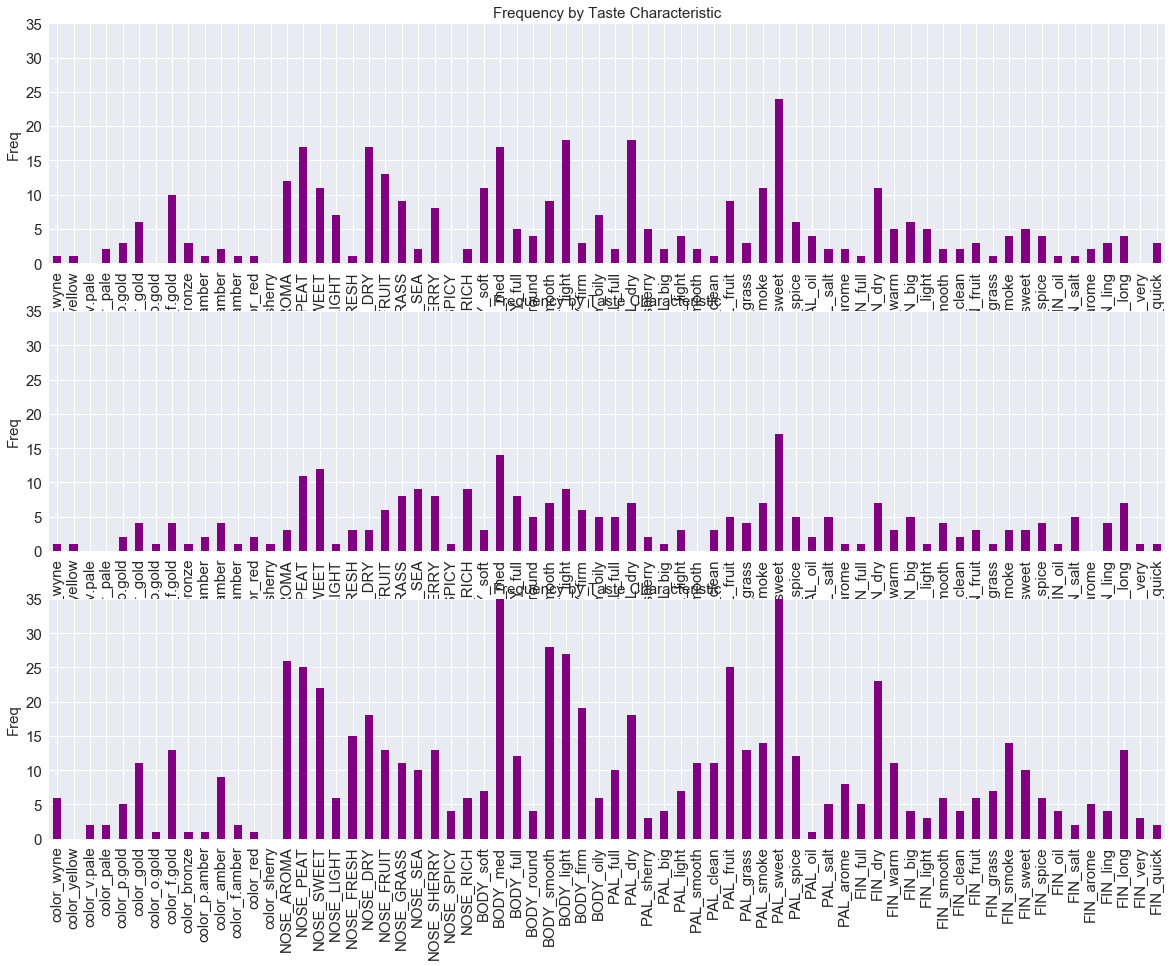

31 Scotches in cluster #1 --- 28.44%
-----------------------------------------------
54 Scotches in cluster #2 --- 49.54%
-----------------------------------------------
24 Scotches in cluster #3 --- 22.02%
-----------------------------------------------


In [57]:
plt.figure(num = 1, figsize = (20,15))

for i in range(k):
    plt.subplot(k,1,i + 1)
    plt.ylabel('Freq', fontsize = 15)
    plt.title('Frequency by Taste Characteristic', fontsize = 15)
    plt.ylim(0,35)
    cluster_list[k - 2][i].plot(kind = 'bar', color = 'purple', fontsize = 15)
    
plt.show()

for j in range(k):
    len_scotches = len(comb_df['NAME_1'][comb_df['K%d' % k] == j])
    perc = (len_scotches / float(len(comb_df['NAME_1']))) * 100.00
    print str(len_scotches) + ' Scotches in cluster #%d' % (j + 1) + " --- %.2f%%" % perc
    print '-----------------------------------------------'

# Import the Distillery Coordinates

In [58]:
dist_coord = pd.read_csv('DistCoord.csv', names = ['dist', 'lon', 'lat'])

In [59]:
dist_coord.head(10)

,dist,lon,lat
0,Aberfeldy,3.875,56.62
1,Aberlour,3.220,57.46
2,Ardberg,6.080,55.64
3,Ardmore,2.670,57.32
4,Auchentoshan,4.390,55.91
5,Aultmore,3.010,57.60
6,Balblair,4.170,57.83
7,Balmenach,3.130,57.42
8,Balvenie,3.100,57.45
9,Banff,2.510,57.65


In [60]:
print scotch_df.join(dist_coord['dist'])[['NAME_1','dist']].iloc[30:80,:]

           NAME_1           dist
30        Dalmore        Dalmore
31     Dalwhinnie     Dalwhinnie
32       Deanston       Deanston
33       Dufftown       Dufftown
34       Edradour       Edradour
35    Fettercairn    Fettercairn
36    Glen  Albyn    Glen  Albyn
37   Glenallachie   Glenallachie
38     Glenburgie     Glenburgie
39      Glencadam      Glencadam
40   Glen Deveron   Glen Deveron
41    Glendronach    Glendronach
42     Glendullan     Glendullan
43     Glen Elgin     Glen Elgin
44        Glenesk        Glenesk
45    Glenfarclas    Glenfarclas
46    Glenfiddich    Glenfiddich
47   Glen Garioch   Glen Garioch
48  Glenglassaugh  Glenglassaugh
49      Glengoyne      Glengoyne
50     Glen Grant     Glen Grant
51     Glen Keith     Glen Keith
52    Glenkinchie    Glenkinchie
53      Glenlivet      Glenlivet
54      Glenlochy      Glenlochy
55     Glenlossie     Glenlossie
56      Glen Mhor      Glen Mhor
57   Glenmorangie   Glenmorangie
58     Glen Moray     Glen Moray
59     Gle

### Add the longitude and latitude to the Scotch dataframe

In [61]:
scotch_df[['LON', 'LAT']] = dist_coord[['lon', 'lat']]

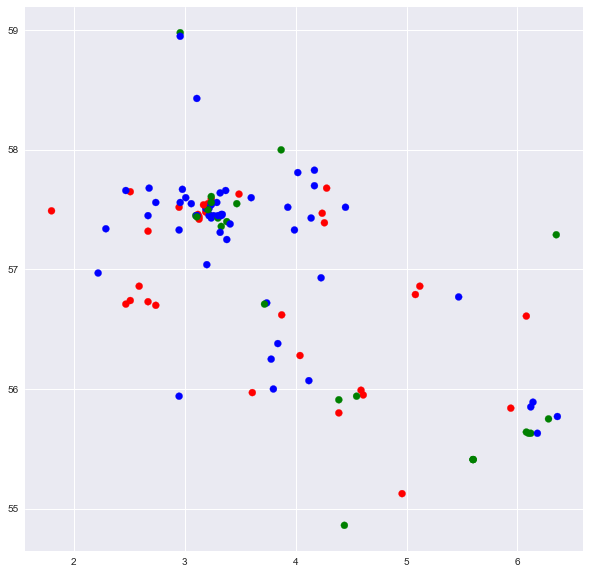

In [62]:
plt.figure(figsize = (10,10))

labels = [i for i in comb_df['K3']]
labels = labels[:109]
colors = ['red','blue','green','purple','yellow','black','orange','black','pink','brown']

colors_list = [colors[i] for i in labels]

plt.scatter(scotch_df.LON, scotch_df.LAT, color = colors_list)
plt.show()

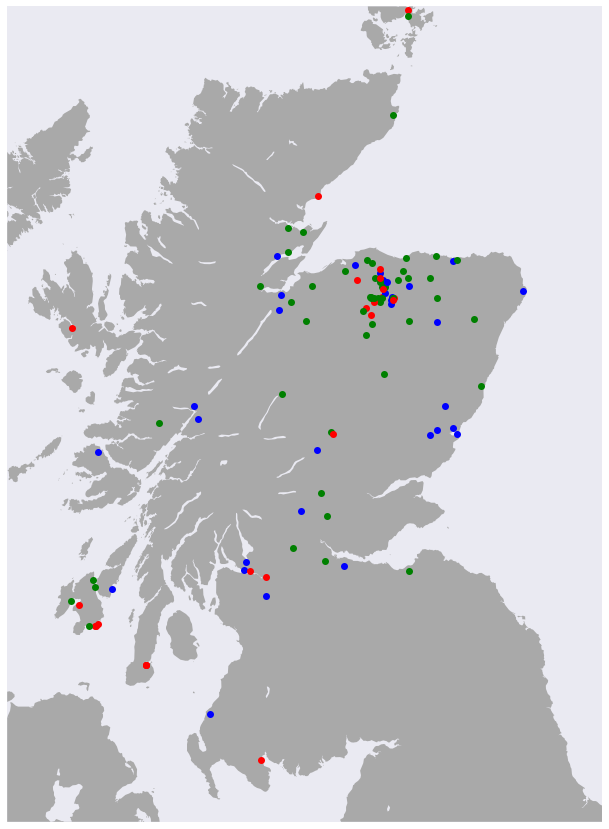

In [63]:
plt.figure(figsize = (15,15))

map = Basemap(projection='merc', lat_0 = 56.4906712, lon_0 = -4.2026458, \
              resolution = 'h', area_thresh = 0.1, \
              llcrnrlon=-7, llcrnrlat=54.5, \
              urcrnrlon=-1, urcrnrlat=59.0)

# map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'darkgrey')
# map.drawmapboundary()

lons = [i * (-1) for i in scotch_df.LON]
lats = [i for i in scotch_df.LAT]
labs = [i for i in comb_df['K3']]

map_colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko','wo']
map_colors_list = [map_colors[c] for c in labs]

def get_marker_color(lab_):
#     print map_colors_list[lab_]
    return map_colors_list[lab_]

#----------------------------------------------------
color_range = range(len(lons))

for lon, lat, lab in zip(lons, lats, color_range):
    x,y = map(lon, lat)
    marker_string = get_marker_color(lab)
    map.plot(x, y, marker_string, markersize=7)

plt.show()

In [65]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [66]:
pc = PCA(n_components=2)
pc.fit(scotch_df.iloc[:,1:])
pc.explained_variance_

# Initialize and carry out clustering
# pca_nparr = np.array(scotch_df.iloc[:,1:72])
pca_nparr = np.array(pc.components_)

In [67]:
np.sum(pc.explained_variance_)

63.993089652063432

In [68]:
pc.explained_variance_ratio_

array([ 0.61304407,  0.18869582])

In [69]:
cols = scotch_df.columns.values[1:]
# print cols
factor_loading_matrix = pd.DataFrame(pc.components_.T,index=cols)
factor_loading_matrix.sort_values(by=[0,1],ascending = False)

,0,1
NOSE_DRY,0.020942,0.012949
BODY_light,0.012638,0.018380
NOSE_LIGHT,0.012164,0.008384
BODY_soft,0.011596,0.004543
PAL_dry,0.010487,-0.003611
NOSE_AROMA,0.010250,-0.008459
NOSE_FRUIT,0.009442,-0.004299
PAL_sweet,0.008975,0.000137
FIN_light,0.006910,-0.003456
LAT,0.006817,-0.051226


# PCA Decomposition

In [70]:
from sklearn import decomposition

In [71]:
X = scotch_df.values
X = X[:,1:]

In [72]:
pca = decomposition.PCA(n_components=10)
pca.fit(X)
X = pca.transform(X)

In [73]:
print pca.explained_variance_ratio_

[ 0.61304407  0.18869582  0.07536669  0.02023242  0.00715245  0.00551405
  0.00505495  0.0045038   0.00432031  0.00415485]


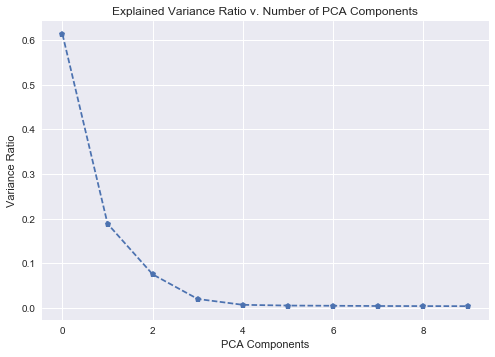

In [74]:
plt.plot(pca.explained_variance_ratio_, 'p--')
plt.xlabel('PCA Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio v. Number of PCA Components')
plt.show()

In [75]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1

[ 61.3   80.17  87.71  89.73  90.45  91.    91.51  91.96  92.39  92.81]


In [76]:
X.shape
print type(X)

<type 'numpy.ndarray'>


# Putting PCA Components in K-Means

In [77]:
# Model the data and create the centroids
pca_km = [KMeans(n_clusters = k).fit(X) for k in range(2,9)]
pca_centroids = [comp.cluster_centers_ for comp in pca_km] # List of lists of centroids
print [len(pca_centroids[c]) for c in range(7)]

[2, 3, 4, 5, 6, 7, 8]


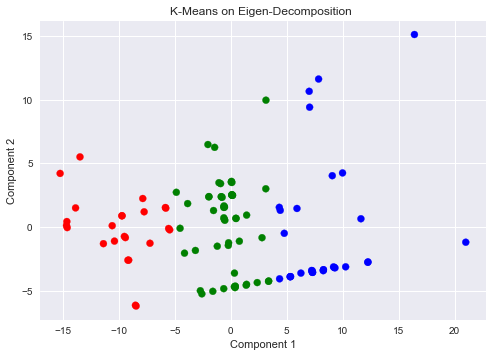

In [78]:
pca_colors = ['red','blue','green','purple','yellow','black','orange','black','pink','brown']
pca_colors_list = [colors[i] for i in pca_km[1].labels_]
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means on Eigen-Decomposition ')
plt.scatter(X[:,0],X[:,1], color = pca_colors_list)
plt.show()

In [79]:
(0.66125156 + 0.24556055)*100

90.68121099999999

In [80]:
# Only use taste features to make the clusters and see if that changes geo location data

# See if you can find out what the principal compononents relate to the most...

In [81]:
# [j.labels_ for j in pca_km]
pca_km[1].labels_

array([1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2], dtype=int32)

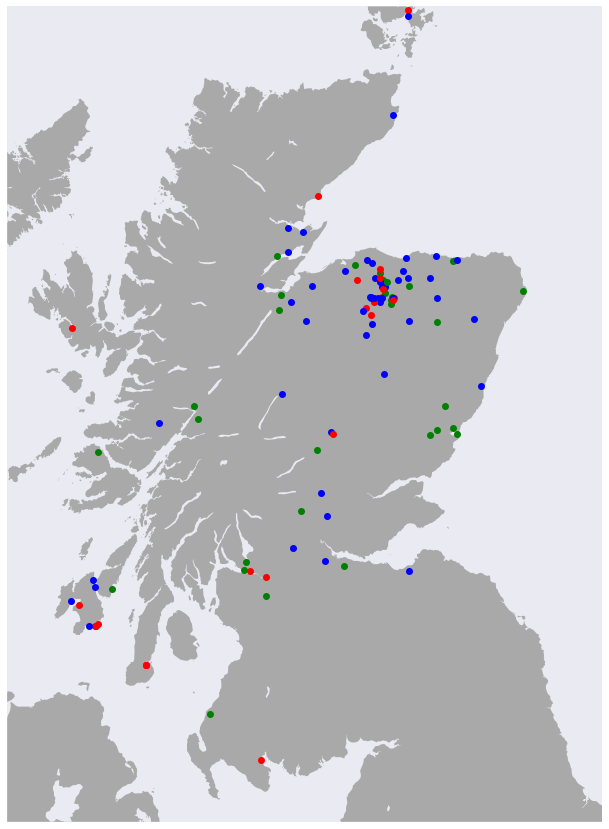

In [82]:
plt.figure(figsize = (15,15))

map = Basemap(projection='merc', lat_0 = 56.4906712, lon_0 = -4.2026458, \
              resolution = 'h', area_thresh = 0.1, \
              llcrnrlon=-7, llcrnrlat=54.5, \
              urcrnrlon=-1, urcrnrlat=59.0)

# map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'darkgrey')
# map.drawmapboundary()

lons = [i * (-1) for i in scotch_df.LON]
lats = [i for i in scotch_df.LAT]
labs = [i for i in pca_km[1].labels_]

map_colors = ['ro', 'go', 'bo', 'co', 'mo', 'yo', 'ko','wo']
map_colors_list = [map_colors[c] for c in labs]

def get_marker_color(lab_):
#     print map_colors_list[lab_]
    return map_colors_list[lab_]

#----------------------------------------------------
color_range = range(len(lons))

for lon, lat, lab in zip(lons, lats, color_range):
    x,y = map(lon, lat)
    marker_string = get_marker_color(lab)
    map.plot(x, y, marker_string, markersize=7)

plt.show()

In [93]:
print comb_df.SCORE[comb_df.K3 == 0].mean()
print comb_df.SCORE[comb_df.K3 == 0].std()
print comb_df.AGE[comb_df.K3 == 0].mean()
print comb_df.AGE[comb_df.K3 == 0].std()
print '------------------------'
print comb_df.SCORE[comb_df.K3 == 1].mean()
print comb_df.SCORE[comb_df.K3 == 1].std()
print comb_df.AGE[comb_df.K3 == 1].mean()
print comb_df.AGE[comb_df.K3 == 1].std()
print '------------------------'
print comb_df.SCORE[comb_df.K3 == 2].mean()
print comb_df.SCORE[comb_df.K3 == 2].std()
print comb_df.AGE[comb_df.K3 == 2].mean()
print comb_df.AGE[comb_df.K3 == 2].std()
print '------------------------'

67.3870967742
3.80943932318
7.24237940219
4.91861992923
------------------------
75.9444444444
1.85733290893
9.16683656133
3.31434125216
------------------------
85.375
2.97544297031
10.4048165138
2.54298565756
------------------------


In [114]:
'''What did you just drink?'''
your_drink = comb_df.NAME_1.iloc[90]
print your_drink

Port Ellen


In [115]:
your_drink_label = comb_df[comb_df.NAME_1 == your_drink]['K3'].values
print "Your drink is in group %d" % (your_drink_label + 1)

Your drink is in group 2


In [116]:
'''What are other drinks that are like yours?'''
other_similar_drinks = comb_df[comb_df.K3 == your_drink_label[0]]['NAME_1']
print other_similar_drinks

5           Aultmore
6           Balblair
12         Benrinnes
13         Benromach
15       Blair Athol
17           Brackla
18     Bruichladdich
19      Bunnahabhain
20          Caol Ila
21       Caperdonich
22            Cardhu
28         Dailuaine
30           Dalmore
31        Dalwhinnie
37      Glenallachie
40      Glen Deveron
41       Glendronach
42        Glendullan
43        Glen Elgin
46       Glenfiddich
47      Glen Garioch
48     Glenglassaugh
49         Glengoyne
50        Glen Grant
52       Glenkinchie
55        Glenlossie
57      Glenmorangie
58        Glen Moray
59        Glen Ordie
60        Glenrothes
62         Glen Spey
63      Glentauchers
64        Glenturret
66     Glenury Royal
68          Imperial
69         Inchgower
74         Knockando
75          Knockdhu
81         Lochnagar
85          Millburn
86        Miltonduff
89              Oban
90        Port Ellen
91          Pulteney
92          Rosebank
94             Scapa
95         Singleton
99        Str